### Import modules

#### Embedding-?
#### GlobalAveragePooling1D-?
#### pad_sequences-?

In [1]:
# TensorFlow and tf.keras
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, GlobalAveragePooling1D
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

### load data 
- #### dataset (x: imdb article -> y: text type)
- #### word2idx dict (key: word; value: index)

### input nod 개수를 만개로 설정 (당연히 imdb의 단어 개수는 10000개를 넘을 것, 빈번하게 나오는 것만 10000개까지 번호를 매기고 그 이상은 unkown으로 처리) 10000으로 설정을 해서 0부터 9999사이의 수다.

In [2]:
vocab_size = 10000
(x_train, y_train), (x_test, y_test) = tensorflow.keras.datasets.imdb.load_data(num_words=vocab_size)
word2idx = tensorflow.keras.datasets.imdb.get_word_index()

1646592/1641221 [==============================] - 1s 1us/step


In [ ]:
이 번호가 단어임, 10000보다 큰건 없음

In [11]:
x_train[0]

array([   1,   14,   22,   16,   43,  530,  973, 1622, 1385,   65,  458,
       4468,   66, 3941,    4,  173,   36,  256,    5,   25,  100,   43,
        838,  112,   50,  670,    2,    9,   35,  480,  284,    5,  150,
          4,  172,  112,  167,    2,  336,  385,   39,    4,  172, 4536,
       1111,   17,  546,   38,   13,  447,    4,  192,   50,   16,    6,
        147, 2025,   19,   14,   22,    4, 1920, 4613,  469,    4,   22,
         71,   87,   12,   16,   43,  530,   38,   76,   15,   13, 1247,
          4,   22,   17,  515,   17,   12,   16,  626,   18,    2,    5,
         62,  386,   12,    8,  316,    8,  106,    5,    4, 2223, 5244,
         16,  480,   66, 3785,   33,    4,  130,   12,   16,   38,  619,
          5,   25,  124,   51,   36,  135,   48,   25, 1415,   33,    6,
         22,   12,  215,   28,   77,   52,    5,   14,  407,   16,   82,
          2,    8,    4,  107,  117, 5952,   15,  256,    4,    2,    7,
       3766,    5,  723,   36,   71,   43,  530,  4

In [ ]:
word2idx 이게 사전임 - 보면 10000보다 큰것도 보임 이중에서 10000밑으로 처리? or 10000밑만 가져온 것

In [12]:
word2idx

{'fawn': 34704,
 'tsukino': 52009,
 'nunnery': 52010,
 'sonja': 16819,
 'vani': 63954,
 'woods': 1411,
 'spiders': 16118,
 'hanging': 2348,
 'woody': 2292,
 'trawling': 52011,
 "hold's": 52012,
 'comically': 11310,
 'localized': 40833,
 'disobeying': 30571,
 "'royale": 52013,
 "harpo's": 40834,
 'canet': 52014,
 'aileen': 19316,
 'acurately': 52015,
 "diplomat's": 52016,
 'rickman': 25245,
 'arranged': 6749,
 'rumbustious': 52017,
 'familiarness': 52018,
 "spider'": 52019,
 'hahahah': 68807,
 "wood'": 52020,
 'transvestism': 40836,
 "hangin'": 34705,
 'bringing': 2341,
 'seamier': 40837,
 'wooded': 34706,
 'bravora': 52021,
 'grueling': 16820,
 'wooden': 1639,
 'wednesday': 16821,
 "'prix": 52022,
 'altagracia': 34707,
 'circuitry': 52023,
 'crotch': 11588,
 'busybody': 57769,
 "tart'n'tangy": 52024,
 'burgade': 14132,
 'thrace': 52026,
 "tom's": 11041,
 'snuggles': 52028,
 'francesco': 29117,
 'complainers': 52030,
 'templarios': 52128,
 '272': 40838,
 '273': 52031,
 'zaniacs': 52133,

일련의 과정을 통해 아웃풋을 한개로 줄인 걸 알 수 있음. 값이 1 이니까 xtrain0(첫번쨰)가 좋음을 알 수있음

In [13]:
y_train[0]

1

### modifiy word2idx dict (to reflect x_train, x_text)

In [17]:
len(word2idx.items())

88588

만약k:v+3에서+3을 하지 않는다면 변하는게 없다. 
k:v - key,value
    pad를 키로 설정 벨류를 0으로
    start를 키로 설정 벨류를 1로 ..이 작업으로 '사전'을 update해주는 것

In [3]:
word2idx = {k:v+3 for k, v in word2idx.items()}
word2idx['<PAD>'] = 0
word2idx['<START>'] = 1
word2idx['<UNK>'] = 2
word2idx['<UNUSED>'] = 3

[역사전]inverse를 해줘야 한다, why? 다 숫자로 돼있는데 이를 단어로 재참조 하기 위해서 (K;V를 v:k로 바꿔주면 됨 그럼 숫자가 먼저 나옴)

### create idx2word: inverse of word2idx

In [4]:
idx2word = {v:k for k, v in word2idx.items()}

### padding x_train, x_test

256 보다 값이 작거나 크게 나오는데, pad_sequences를 이용해 길이를 256으로 늘려주거나 줄여준다. 
ex) len(x_train[0])했을 떄 216이 나오면 나머지 40은 pad가 채워준다(숫자 0이 채워준다).

In [18]:
x_train = pad_sequences(x_train, value=word2idx['<PAD>'], padding='post', maxlen=256)
x_test = pad_sequences(x_test, value=word2idx['<PAD>'], padding='post', maxlen=256)

## 10000으로 설정을 해서 0부터 9999사이의 수다. 각각의 숫자가 input 10000이 된다. ex)4면 0001000000~해서 0이 만까지 가는것

In [22]:
x_train[0]

array([   1,   14,   22,   16,   43,  530,  973, 1622, 1385,   65,  458,
       4468,   66, 3941,    4,  173,   36,  256,    5,   25,  100,   43,
        838,  112,   50,  670,    2,    9,   35,  480,  284,    5,  150,
          4,  172,  112,  167,    2,  336,  385,   39,    4,  172, 4536,
       1111,   17,  546,   38,   13,  447,    4,  192,   50,   16,    6,
        147, 2025,   19,   14,   22,    4, 1920, 4613,  469,    4,   22,
         71,   87,   12,   16,   43,  530,   38,   76,   15,   13, 1247,
          4,   22,   17,  515,   17,   12,   16,  626,   18,    2,    5,
         62,  386,   12,    8,  316,    8,  106,    5,    4, 2223, 5244,
         16,  480,   66, 3785,   33,    4,  130,   12,   16,   38,  619,
          5,   25,  124,   51,   36,  135,   48,   25, 1415,   33,    6,
         22,   12,  215,   28,   77,   52,    5,   14,  407,   16,   82,
          2,    8,    4,  107,  117, 5952,   15,  256,    4,    2,    7,
       3766,    5,  723,   36,   71,   43,  530,  4

### create model

### Embedding: 256의 숫자를 256x10000으로 바꿔주는 것. 
   # 시험문제:256x10000의 메트릭스에 나타느는 1의 숫자는? or 0의 숫자는? 1의 개수 - 256개, 0의 개수 256x10000-256 
   ## why? 4면 0001000~ 이고 7이면 0000007000~ㄲ 이런식이니까

모든 리뷰는 256x10000인데 히든 레이어를 거쳐 256x128인데 평균(GlobalAveragePooling1D)을 해주면 128x1

In [6]:
model = Sequential()
model.add(Embedding(vocab_size, 128))
model.add(GlobalAveragePooling1D())
model.add(Dense(1, activation='sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.


In [7]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 128)         1280000   
_________________________________________________________________
global_average_pooling1d (Gl (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 1,280,129
Trainable params: 1,280,129
Non-trainable params: 0
_________________________________________________________________


In [8]:
Adam = tensorflow.keras.optimizers.Adam
model.compile(optimizer = Adam(lr=0.0005), loss='binary_crossentropy', metrics=['accuracy'])

In [9]:
print(model.input_shape)
print(model.output_shape)

(None, None)
(None, 1)


### train model

In [10]:
history = model.fit(x_train, y_train, epochs=10, validation_split=0.33)

Train on 16750 samples, validate on 8250 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/10
16750/16750 [==============================] - 15s 876us/sample - loss: 0.6565 - acc: 0.7074 - val_loss: 0.5885 - val_acc: 0.7862
Epoch 2/10
16750/16750 [==============================] - 14s 807us/sample - loss: 0.5067 - acc: 0.8270 - val_loss: 0.4457 - val_acc: 0.8385
Epoch 3/10
16750/16750 [==============================] - 14s 813us/sample - loss: 0.3875 - acc: 0.8685 - val_loss: 0.3692 - val_acc: 0.8619
Epoch 4/10
16750/16750 [==============================] - 14s 813us/sample - loss: 0.3219 - acc: 0.8864 - val_loss: 0.3300 - val_acc: 0.8738
Epoch 5/10
16750/16750 [==============================] - 14s 810us/sample - loss: 0.2811 - acc: 0.9011 - val_loss: 0.3071 - val_acc: 0.8802
Epoch 6/10
16750/16750 [==============================] - 14s 810us/sample - loss: 0.2518 - acc: 0.9113 - val_loss: 0.2935 - val_acc: 0.8844
Epoch 7/10
16750/16750 [==============================] -

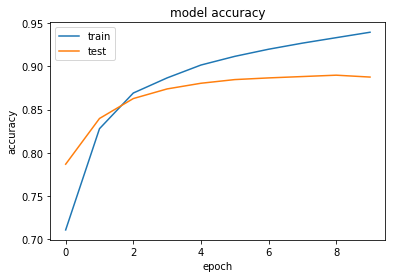

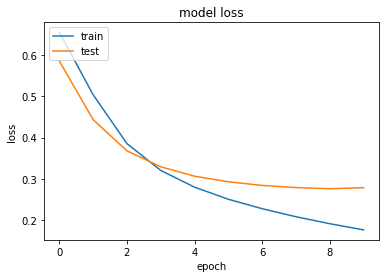

In [12]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### test model

In [14]:
model.evaluate(x_test, y_test)

25000/25000 [==============================] - 3s 117us/sample - loss: 0.2913 - acc: 0.8798


[0.2913140876865387, 0.8798]

### inference

In [23]:
testID = 100
print(' '.join([idx2word[idx] for idx in x_test[testID]]))

out = model.predict(x_test[testID].reshape(1,256))
print(y_test[testID])
print(out)

<START> a quick glance at the premise of this film would seem to indicate just another dumb <UNK> <UNK> <UNK> slash fest the type where sex equals death and the actors are all annoying stereotypes you actually want to die however delivers considerably more br br rather than focus on bare flesh and gore though there is a little of each no sex however the flick focuses on delivering impending dread <UNK> tension amidst a lovely <UNK> backdrop these feelings are further <UNK> by a cast of realistically likable characters and <UNK> that are more amoral than cardboard <UNK> of evil oh yeah george kennedy is here too and when is that not a good thing br br if you liked wrong turn then watch this to see where much of its' <UNK> came from <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <

start가 위의 1, a가 6 quick이 1605 이런식, 이거의 최대 길이는 256이다, 부족하면 <pad>로 채울 수 있다. 

In [14]:
x_test[100]

array([   1,    6, 1605, 7334,   33,    4,  863,    7,   14,   22,   62,
        306,    8, 7147,   43,  160,  995,    2,    2,    2, 8462, 3340,
          4,  552,  121,  383, 9538,  341,    5,    4,  156,   26,   32,
        616, 2118,   25,  165,  181,    8,  783,  190, 1545, 5779,   53,
         10,   10,  247,   74, 1152,   23, 3883, 2120,    5,  599,  151,
         50,    9,    6,  117,    7,  257,   57,  383,  190,    4,  509,
       2679,   23, 4498, 8153, 6249,    2, 1074, 6929,    6, 1334,    2,
       4157,  134, 1417,   26, 1037,    2,   34,    6,  177,    7, 7292,
       1451,  105,    5,    2,   15,   26,   53, 8955,   74, 3440,    2,
          7,  445,  449, 1243,  742, 4224,    9,  133,   99,    5,   54,
          9,   15,   24,    6,   52,  155,   10,   10,   48,   25,  423,
        355,  471,   95,  106,   14,    8,   67,  121,   76,    7, 9665,
          2,  385,   39,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

In [ ]:
len